<a href="https://colab.research.google.com/github/SalomaoX/Projetos-Data-Science/blob/main/i2a2_Grupo28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Hipótese: Comunidades com maior índice de desmatamento tendem a apresentar menor cobertura vegetal residual, maior frequência de queimadas e pior acesso à água potável, especialmente em regiões com alta densidade populacional ou proximidade de áreas urbanas.

In [3]:
df = pd.read_csv('Dataset_de_200_Comunidades_para_Analise_Ambiental.csv')

In [4]:
display(df.head())
print(df.shape)
display(df.info())

,Comunidade,Município,Estado,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Presença de Escola (Sim/Não),Presença de Unidade de Saúde (Sim/Não)
0,Comunidade 1,SÃO DOMINGOS DO CAPIM,Pará,25.6,86.5,22.9,2863.0,123.2,0,74.7,Sim,Não
1,Comunidade 2,SALINÓPOLIS,Pará,12.9,99.3,21.8,799.0,120.3,11,87.3,Sim,Não
2,Comunidade 3,TRACUATEUA,Pará,81.3,58.9,64.5,1924.0,104.8,5,43.9,Não,Sim
3,Comunidade 4,SÃO MIGUEL DO GUAMÁ,Pará,81.5,56.0,25.5,1715.0,42.3,0,5.3,Sim,Sim
4,Comunidade 5,MAGALHÃES BARATA,Pará,58.8,84.3,39.4,1990.0,89.4,9,17.0,Sim,Sim


(200, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Comunidade                              200 non-null    object 
 1   Município                               200 non-null    object 
 2   Estado                                  200 non-null    object 
 3   Índice de Desmatamento (%)              200 non-null    float64
 4   Acesso à Água Potável (%)               200 non-null    float64
 5   Cobertura Vegetal (%)                   200 non-null    float64
 6   Renda Média Mensal (R$)                 200 non-null    float64
 7   Densidade Populacional (hab/km²)        200 non-null    float64
 8   Frequência de Queimadas (ano)           200 non-null    int64  
 9   Distância de Área Urbana (km)           200 non-null    float64
 10  Presença de Escola (Sim/Não)            200 non-null

None

In [5]:
# Mapear valores 'Sim' e 'Não' para 1 e 0, se necessário para plots

df['Presença de Escola (Sim/Não)'] = df['Presença de Escola (Sim/Não)'].map({'Sim': 1, 'Não': 0}).astype('int64')
df['Presença de Unidade de Saúde (Sim/Não)'] = df['Presença de Unidade de Saúde (Sim/Não)'].map({'Sim': 1, 'Não': 0}).astype('int64')

In [6]:
# Visualização para a hipótese
# Correlação entre as variáveis da hipótese

variaveis_hipotese = ['Índice de Desmatamento (%)', 'Cobertura Vegetal (%)', 'Frequência de Queimadas (ano)',
                     'Acesso à Água Potável (%)', 'Densidade Populacional (hab/km²)', 'Distância de Área Urbana (km)']

In [7]:
# Criar um sub-dataframe apenas com as colunas relevantes para a hipótese

df_hipotese = df[variaveis_hipotese].copy()

In [8]:
# Calcular a matriz de correlação

correlation_matrix_hipotese = df_hipotese.corr()

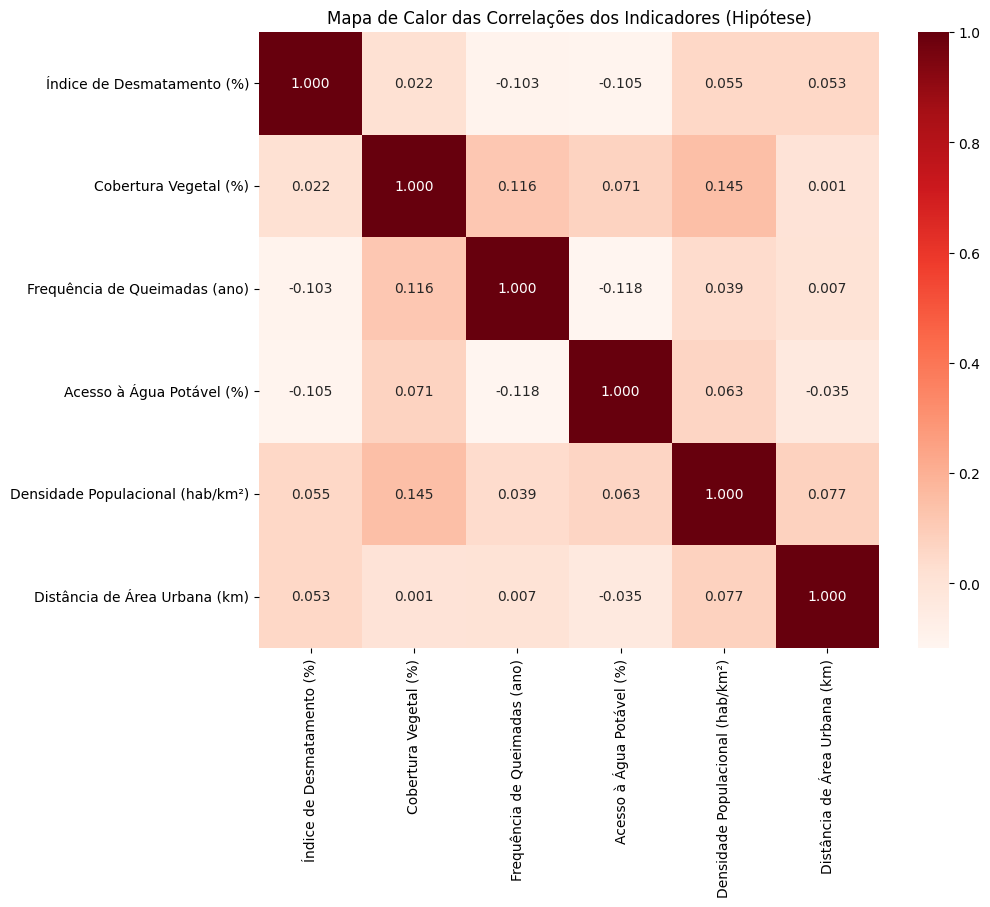

In [9]:
# Mapa de calor das correlações

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_hipotese, annot=True, cmap='Reds', fmt=".3f")
plt.title('Mapa de Calor das Correlações dos Indicadores (Hipótese)')
plt.show()

Scatter plots para visualizar as relações principais

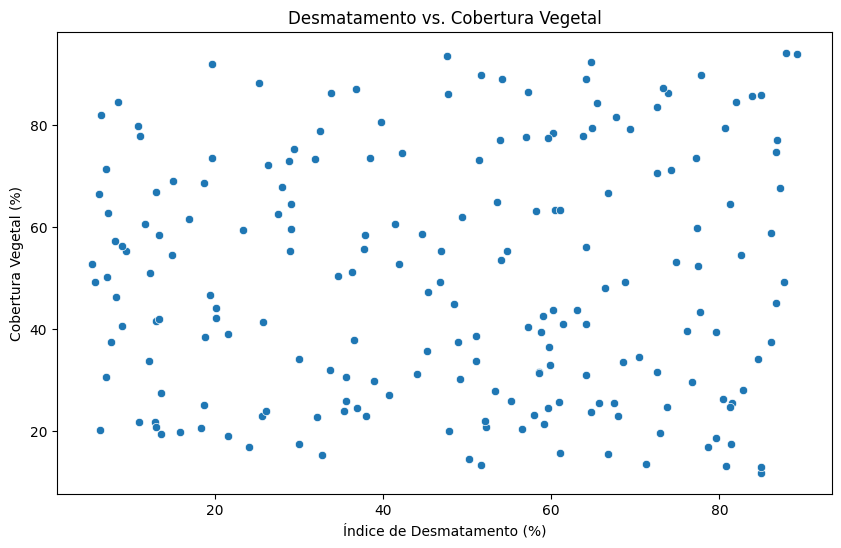

In [10]:
# Desmatamento vs Cobertura Vegetal
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Índice de Desmatamento (%)', y='Cobertura Vegetal (%)')
plt.title('Desmatamento vs. Cobertura Vegetal')
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Cobertura Vegetal (%)')
plt.show()

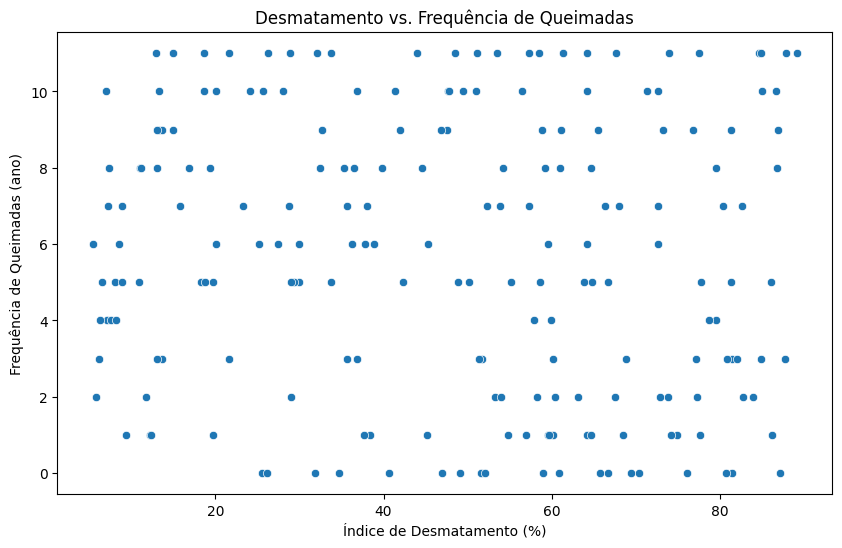

In [11]:
# Desmatamento vs Frequência de Queimadas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Índice de Desmatamento (%)', y='Frequência de Queimadas (ano)')
plt.title('Desmatamento vs. Frequência de Queimadas')
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Frequência de Queimadas (ano)')
plt.show()

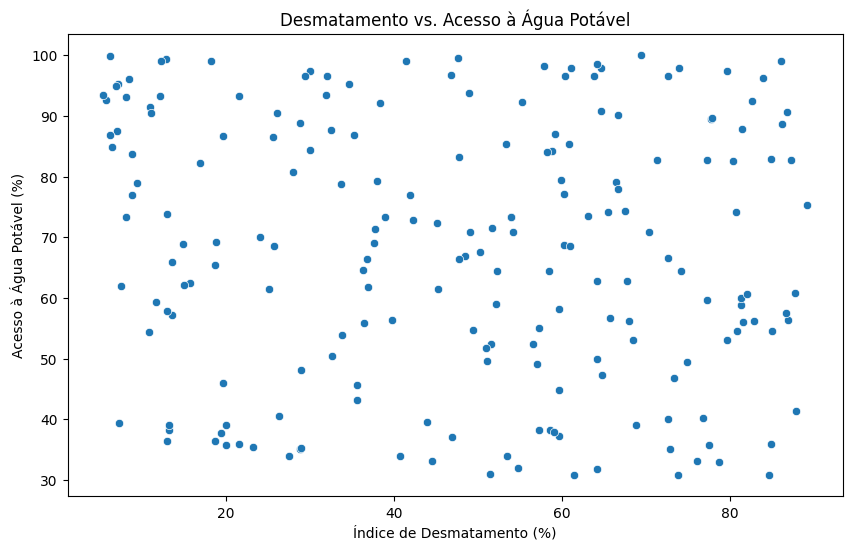

In [12]:
# Desmatamento vs Acesso à Água Potável
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Índice de Desmatamento (%)', y='Acesso à Água Potável (%)')
plt.title('Desmatamento vs. Acesso à Água Potável')
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Acesso à Água Potável (%)')
plt.show()

Análise considerando Densidade Populacional e Distância de Área Urbana

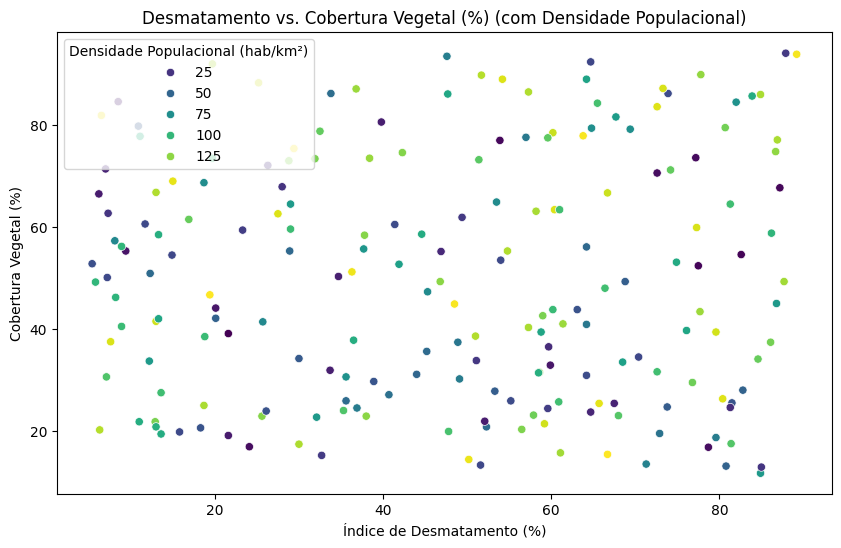

In [13]:
# Desmatamento vs Cobertura Vegetal (com Densidade Populacional)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Índice de Desmatamento (%)', y='Cobertura Vegetal (%)', hue='Densidade Populacional (hab/km²)', palette='viridis')
plt.title('Desmatamento vs. Cobertura Vegetal (%) (com Densidade Populacional)')
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Cobertura Vegetal (%)')
plt.show()

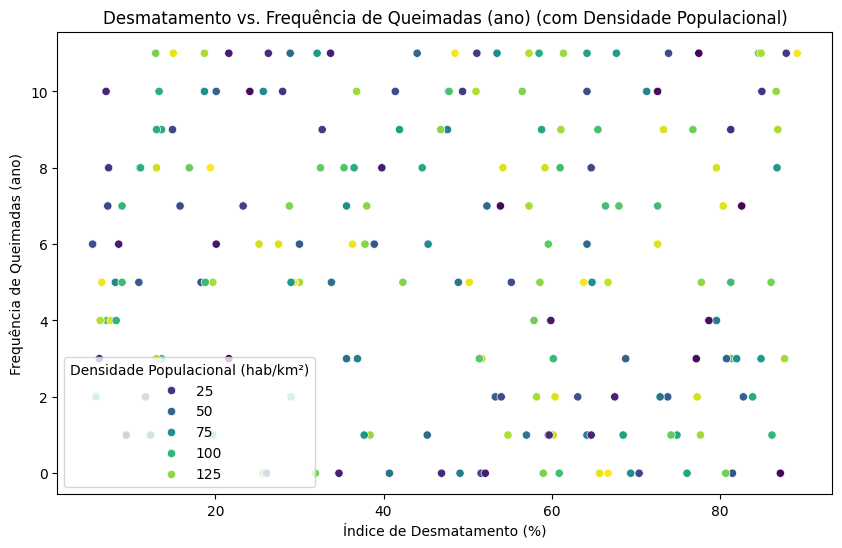

In [14]:
# Desmatamento vs Frequência de Queimadas (com Densidade Populacional)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Índice de Desmatamento (%)', y='Frequência de Queimadas (ano)', hue='Densidade Populacional (hab/km²)', palette='viridis')
plt.title('Desmatamento vs. Frequência de Queimadas (ano) (com Densidade Populacional)')
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Frequência de Queimadas (ano)')
plt.show()

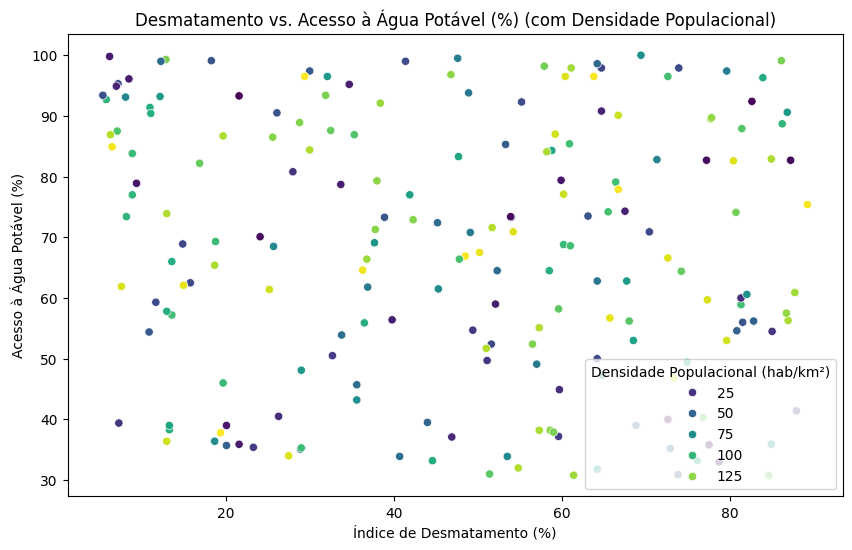

In [15]:
# Desmatamento vs Acesso à Água Potável (com Densidade Populacional)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Índice de Desmatamento (%)', y='Acesso à Água Potável (%)', hue='Densidade Populacional (hab/km²)', palette='viridis')
plt.title('Desmatamento vs. Acesso à Água Potável (%) (com Densidade Populacional)')
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Acesso à Água Potável (%)')
plt.show()

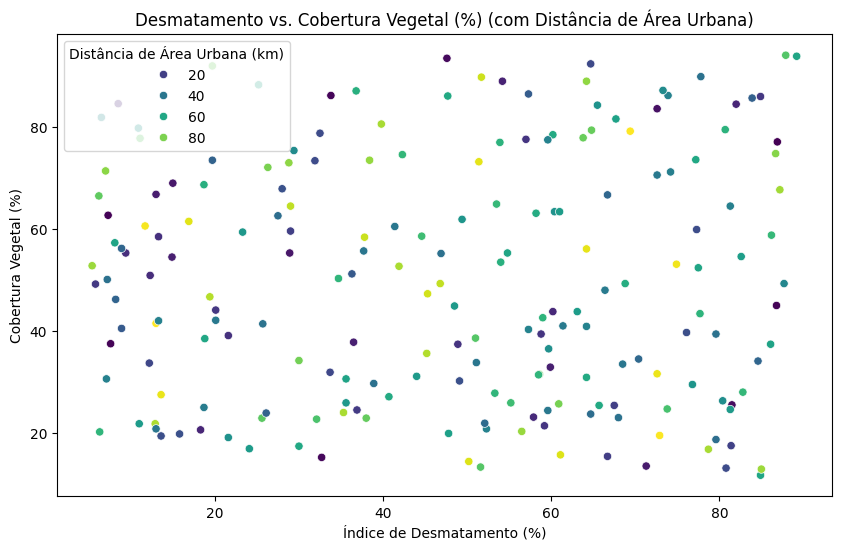

In [16]:
# Desmatamento vs Cobertura Vegetal (com Distância de Área Urbana)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Índice de Desmatamento (%)', y='Cobertura Vegetal (%)', hue='Distância de Área Urbana (km)', palette='viridis')
plt.title('Desmatamento vs. Cobertura Vegetal (%) (com Distância de Área Urbana)')
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Cobertura Vegetal (%)')
plt.show()

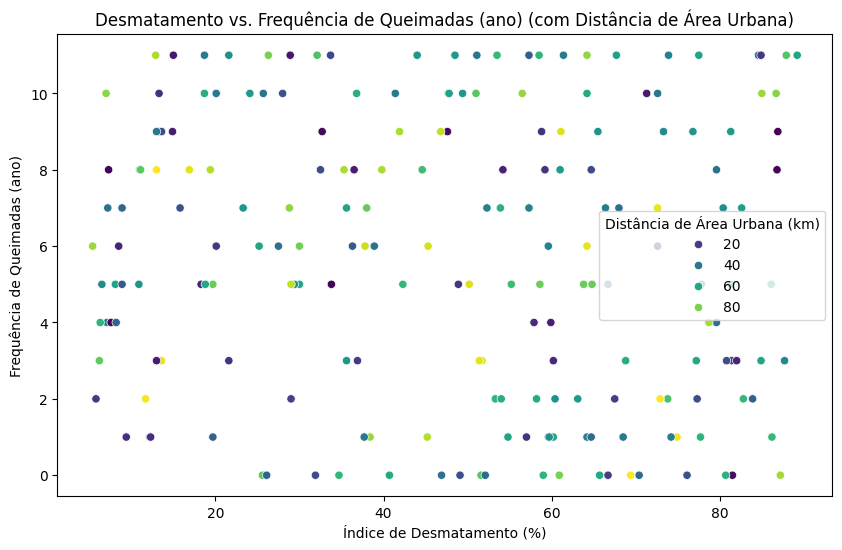

In [17]:
# Desmatamento vs Frequência de Queimadas (com Distância de Área Urbana)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Índice de Desmatamento (%)', y='Frequência de Queimadas (ano)', hue='Distância de Área Urbana (km)', palette='viridis')
plt.title('Desmatamento vs. Frequência de Queimadas (ano) (com Distância de Área Urbana)')
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Frequência de Queimadas (ano)')
plt.show()

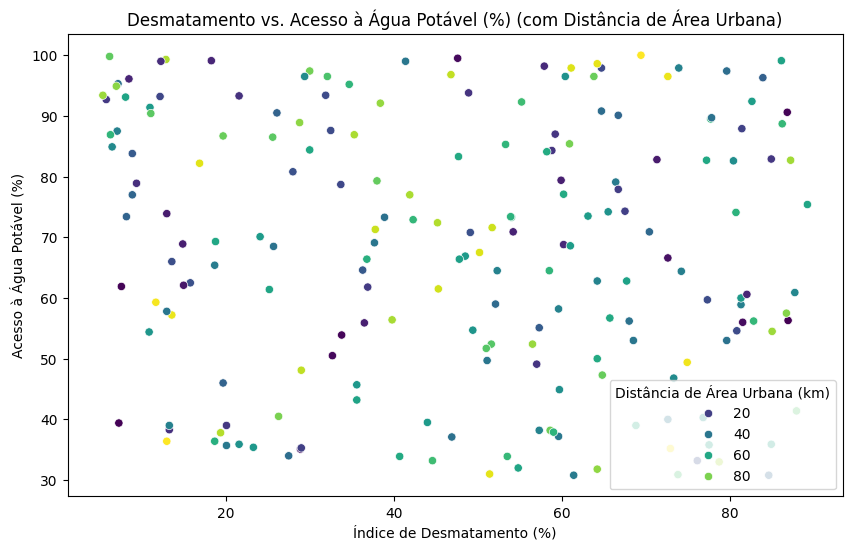

In [18]:
# Desmatamento vs Acesso à Água Potável (com Distância de Área Urbana)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Índice de Desmatamento (%)', y='Acesso à Água Potável (%)', hue='Distância de Área Urbana (km)', palette='viridis')
plt.title('Desmatamento vs. Acesso à Água Potável (%) (com Distância de Área Urbana)')
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Acesso à Água Potável (%)')
plt.show()

Boxplot de Cobertura Vegetal por Categorias de Desmatamento (usando as categorias criadas anteriormente)

<ipython-input-21-4fee3d8d0e39>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria_Desmatamento', y='Cobertura Vegetal (%)', data=df, order=['Baixo', 'Médio', 'Alto'], palette='Greens')


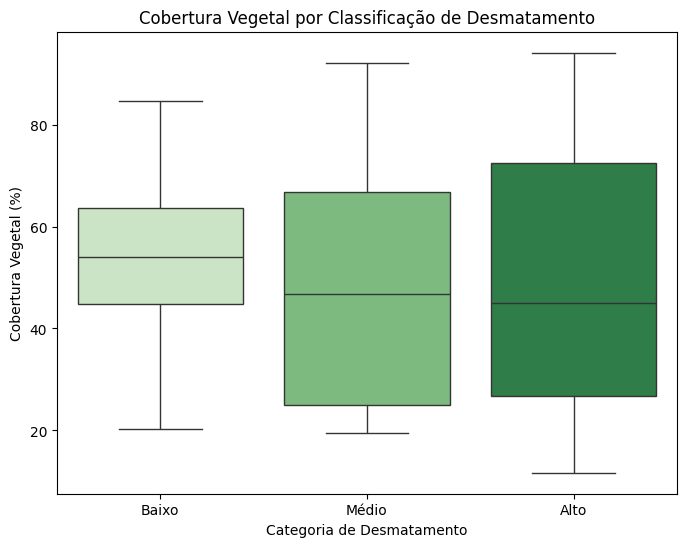

In [21]:
# Boxplot de Cobertura Vegetal por Categorias de Desmatamento
bins = [0, 10, 20, 100]
labels = ['Baixo', 'Médio', 'Alto']
df['Categoria_Desmatamento'] = pd.cut(df['Índice de Desmatamento (%)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Categoria_Desmatamento', y='Cobertura Vegetal (%)', data=df, order=['Baixo', 'Médio', 'Alto'], palette='Greens')
plt.title('Cobertura Vegetal por Classificação de Desmatamento')
plt.xlabel('Categoria de Desmatamento')
plt.ylabel('Cobertura Vegetal (%)')
plt.show()

<ipython-input-22-6462d3496a53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria_Desmatamento', y='Frequência de Queimadas (ano)', data=df, order=['Baixo', 'Médio', 'Alto'], palette='Oranges')


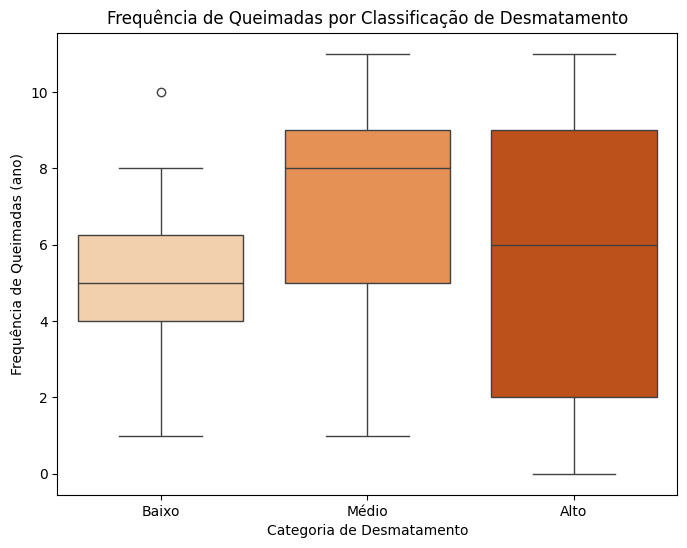

In [22]:
# Boxplot de Frequência de Queimadas por Categorias de Desmatamento
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categoria_Desmatamento', y='Frequência de Queimadas (ano)', data=df, order=['Baixo', 'Médio', 'Alto'], palette='Oranges')
plt.title('Frequência de Queimadas por Classificação de Desmatamento')
plt.xlabel('Categoria de Desmatamento')
plt.ylabel('Frequência de Queimadas (ano)')
plt.show()

<ipython-input-23-84861fd0331f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria_Desmatamento', y='Acesso à Água Potável (%)', data=df, order=['Baixo', 'Médio', 'Alto'], palette='Blues')


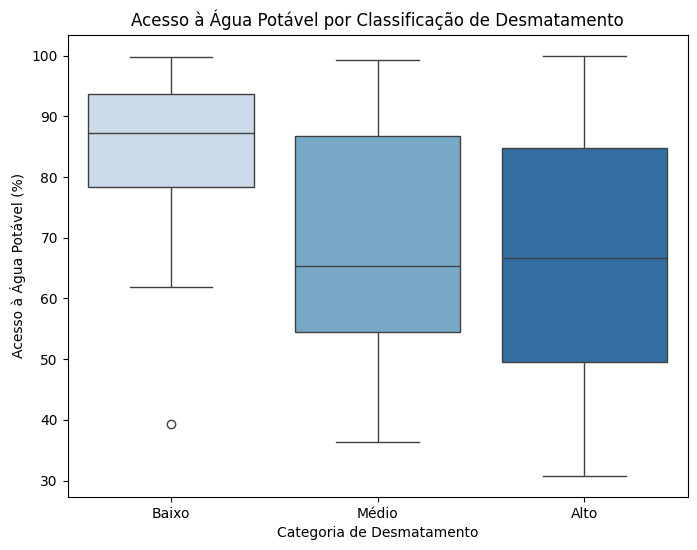

In [23]:
# Boxplot de Acesso à Água Potável por Categorias de Desmatamento
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categoria_Desmatamento', y='Acesso à Água Potável (%)', data=df, order=['Baixo', 'Médio', 'Alto'], palette='Blues')
plt.title('Acesso à Água Potável por Classificação de Desmatamento')
plt.xlabel('Categoria de Desmatamento')
plt.ylabel('Acesso à Água Potável (%)')
plt.show()

<ipython-input-24-fbf0e4cf6869>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('Categoria_Desmatamento')[variaveis_hipotese].mean().loc[labels]


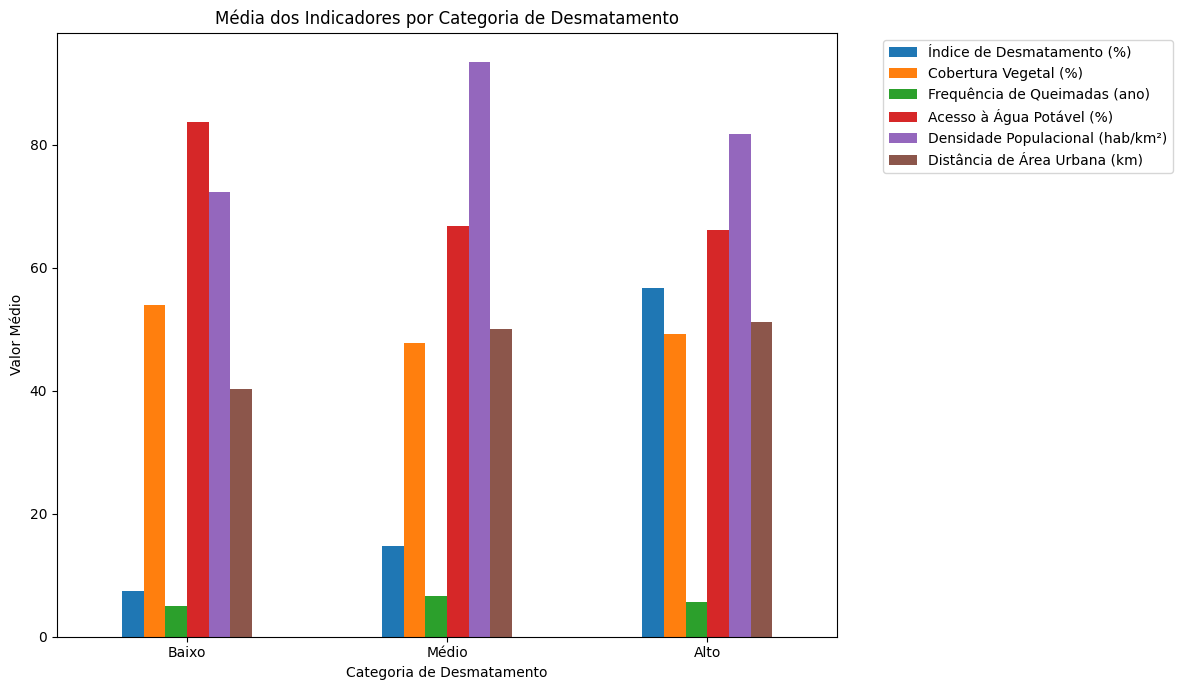

In [24]:
# Gráfico de barras da média dos indicadores por categoria de desmatamento
df_grouped = df.groupby('Categoria_Desmatamento')[variaveis_hipotese].mean().loc[labels]
df_grouped.plot(kind='bar', figsize=(12, 7))
plt.title('Média dos Indicadores por Categoria de Desmatamento')
plt.ylabel('Valor Médio')
plt.xlabel('Categoria de Desmatamento')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()